## Load Stuff

In [1]:
import torch
from mario_gpt import MarioDataset, MarioLM, TrainingConfig, MarioGPTTrainer
from mario_gpt.utils import view_level, convert_level_to_png, join_list_of_list, characterize
from transformers import AutoConfig, AutoModelWithLMHead

#BASE = "distilgpt2"
#mario_lm = MarioLM(lm_path=BASE, tokenizer_path=BASE)

BASE = "google/mobilebert-uncased"
mario_lm = MarioLM(lm_path=BASE, tokenizer_path=BASE, mask_model=True)

dataset = MarioDataset(mario_lm.tokenizer)

Using google/mobilebert-uncased lm
Using google/mobilebert-uncased tokenizer
No level string specified, using default string FULL_LEVEL_STR_WITH_PATHS...





### Load Dataset (Optional)

In [2]:
print(dataset.input_ids[:140])

level_tokens = dataset.input_ids[:140]

str_list = dataset.tokenizer.decode(level_tokens.detach().cpu()).replace("<mask>", "Y")
str_list = str_list.replace("[CLS]", "").replace("[UNK]", "").replace(' ', '')

str_list = [str_list[i : i + 14] for i in range(0, len(str_list), 14)]
for i in range(len(str_list)):
    length = len(str_list[i])
    diff = 14 - length
    if diff > 0:
        str_list[i] = str_list[i] + "Y" * diff

print(str_list)

#test = "Xx------------Xx------------Xx------------Xx------------"
#test = ' '.join(test)
#encoding = dataset.tokenizer.encode(test)
#toks = dataset.tokenizer.convert_ids_to_tokens(encoding)
#print(encoding)
#print(toks)
    

tensor([ 2, 16, 16,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 16, 16,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 16, 16,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5, 16, 16,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5, 16, 16,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 16,
        16,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 16, 16,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5, 16, 16,  5,  5,  5, 12,  5,  5,  5,
         5,  5,  5,  5,  5, 16, 16,  5,  5, 16, 16, 16, 16, 16,  5,  5,  5,  5,
         5, 16, 16,  5,  5, 15,  5,  5,  5, 15,  5,  5,  5,  5])
['xx------------', 'xx------------', 'xx------------', 'xx------------', 'xx------------', 'xx------------', 'xx------------', 'xx---e--------', 'xx--xxxxx-----', 'xx--s---s----Y']


In [4]:
train_dataset = dataset
batch_size = 4
indices = list(
    torch.randint(low=0, high=len(train_dataset), size=(batch_size,)).long()
)

batch = train_dataset[indices]
b_input_ids = batch[0].view(batch_size, -1)
b_position_ids = torch.arange(b_input_ids.size(1)).unsqueeze(0).expand_as(b_input_ids)
b_labels = batch[0].view(batch_size, -1)
print(indices)
print(batch)
print(b_input_ids)
print(b_position_ids)
        

[tensor(4448), tensor(2631), tensor(2715), tensor(5219)]
(tensor([[ 5, 17, 14,  ...,  5,  5,  5],
        [ 5,  5,  5,  ...,  5,  5,  5],
        [ 5, 17, 10,  ...,  5,  5,  5],
        [ 5, 17, 14,  ...,  5,  5,  5]]), tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]))
tensor([[ 5, 17, 14,  ...,  5,  5,  5],
        [ 5,  5,  5,  ...,  5,  5,  5],
        [ 5, 17, 10,  ...,  5,  5,  5],
        [ 5, 17, 14,  ...,  5,  5,  5]])
tensor([[  0,   1,   2,  ..., 697, 698, 699],
        [  0,   1,   2,  ..., 697, 698, 699],
        [  0,   1,   2,  ..., 697, 698, 699],
        [  0,   1,   2,  ..., 697, 698, 699]])


In [2]:
view_level(dataset.input_ids[:140], dataset.tokenizer)

['---------Y',
 '----------',
 '----------',
 '----------',
 '----------',
 '--------xs',
 '--------x-',
 '--------x-',
 '-------ex-',
 '--------xs',
 '----------',
 '----------',
 'pppppppppp',
 'xxxxxxxxxx']

/Users/james/Envs/research3.11/lib/python3.11/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


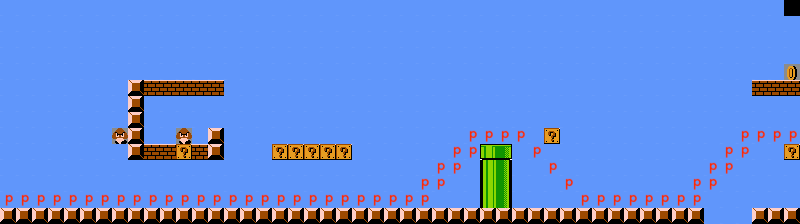

In [3]:
img = convert_level_to_png(dataset.input_ids[:700],  dataset.tokenizer)[0]
img

### Setup training

In [2]:
config = TrainingConfig(save_iteration=200, output_dir="/Users/james/data/ml_models/mario_mobilebert/output")
trainer = MarioGPTTrainer(mario_lm, dataset, config=config)
trainer.train(20000, batch_size=1)

/Users/james/Envs/research3.11/lib/python3.11/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training for 20000 Iterations and batch_size 1
================== Training Config ==================
gradient_accumulation_steps -- 1
mixed_precision -- no
output_dir -- /Users/james/data/ml_models/mario_mobilebert/output
learning_rate -- 0.0005
epsilon -- 1e-09
lr_warmup_steps -- 1000
batch_size -- 4
total_steps -- 50000
mask_proportion -- 0.0
eval_iteration -- 1000
save_iteration -- 200
================== MarioLM ==================
Follow tensorboard with: python -m tensorboard.main --logdir /Users/james/data/ml_models/mario_mobilebert/output


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
{'loss': 6.402962753782049e-05, 'last_lr': 0.0005}:   5%|▍         | 999/20000 [15:54<4:59:14,  1.06it/s]                 

Evaluating...
Failed to evaluate! 'MarioBert' object has no attribute 'sample'


{'loss': 5.2211256843293086e-05, 'last_lr': 0.000498734693877551}:   6%|▌         | 1124/20000 [17:53<5:00:26,  1.05it/s] 


KeyboardInterrupt: 

In [4]:
dataset.tokenizer.save_pretrained("/Users/james/data/ml_models/mario_mobilebert/output/tokenizer")

('/Users/james/data/ml_models/mario_mobilebert/output/tokenizer_config.json',
 '/Users/james/data/ml_models/mario_mobilebert/output/special_tokens_map.json',
 '/Users/james/data/ml_models/mario_mobilebert/output/vocab.txt',
 '/Users/james/data/ml_models/mario_mobilebert/output/added_tokens.json',
 '/Users/james/data/ml_models/mario_mobilebert/output/tokenizer.json')

In [10]:
from transformers import pipeline

lm = mario_lm.lm.to(torch.device('cpu'))
fill_mask = pipeline(
    "fill-mask",
    model=lm,
    tokenizer=dataset.tokenizer
)

print(fill_mask.tokenizer.mask_token)

print(
    fill_mask(f"x {fill_mask.tokenizer.mask_token}")
)

[MASK]
[{'score': 0.03666618466377258, 'token': 1996, 'token_str': '', 'sequence': ''}, {'score': 0.024052590131759644, 'token': 1012, 'token_str': '', 'sequence': ''}, {'score': 0.02249668911099434, 'token': 1997, 'token_str': '', 'sequence': ''}, {'score': 0.01881580613553524, 'token': 1005, 'token_str': '', 'sequence': ''}, {'score': 0.018587304279208183, 'token': 1011, 'token_str': '', 'sequence': ''}]


shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 13, last: 61: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1400/1400 [03:33<00:00,  6.55it/s]
/Users/james/Envs/research3.11/lib/python3.11/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2BC541AD0> (0, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2BC541AD0> (1, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2BC541AD0> (2, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2BC541AD0> (3, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2BC541AD0> (4, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2BC541AD0> (5, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2BC541AD0> (6, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2BC541AD0> (7, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2BC541AD0> (8, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2BC541AD0> (9, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2BC541

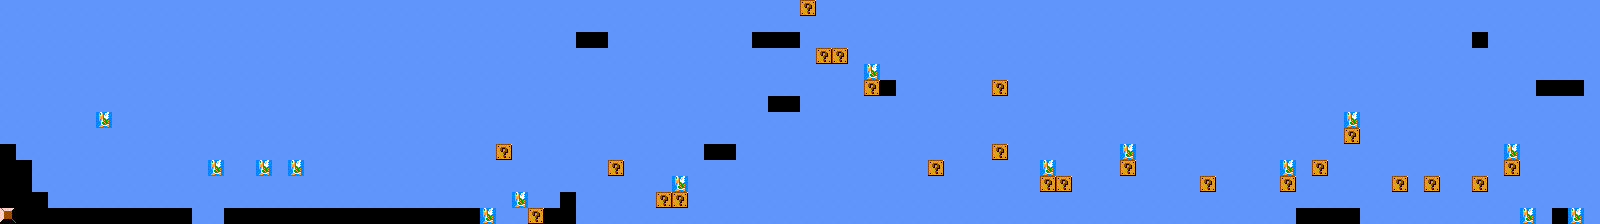

In [10]:
prompts = ["many pipes, many enemies, some blocks, high elevation"]
mario_lm_cpu = mario_lm.to(torch.device('cpu'))
generated_level = mario_lm_cpu.sample(
    prompts=prompts,
    num_steps=1400,
    temperature=2.0,
    use_tqdm=True
)
generated_level.img